In [10]:
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
link='https://www.amazon.in/Apple-iPad-10-2-inch-Wi-Fi-32GB/product-reviews/B07XVKRMRK?reviewerType=all_reviews'

In [6]:
## Getting reviews of first five pages
review_list=[]

for k in range(0,6):
    review_link=link+'&pageNumber='+str(k)
    print(review_link)
    page=requests.get(review_link)
    soup=BeautifulSoup(page.content,'html.parser')
    reviews=soup.find_all('span',class_='review-text-content')
    
    for i in range(0,len(reviews)):
        
        review_list.append(reviews[i].get_text().strip())

https://www.amazon.in/Apple-iPad-10-2-inch-Wi-Fi-32GB/product-reviews/B07XVKRMRK?reviewerType=all_reviews&pageNumber=0
https://www.amazon.in/Apple-iPad-10-2-inch-Wi-Fi-32GB/product-reviews/B07XVKRMRK?reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Apple-iPad-10-2-inch-Wi-Fi-32GB/product-reviews/B07XVKRMRK?reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Apple-iPad-10-2-inch-Wi-Fi-32GB/product-reviews/B07XVKRMRK?reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Apple-iPad-10-2-inch-Wi-Fi-32GB/product-reviews/B07XVKRMRK?reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Apple-iPad-10-2-inch-Wi-Fi-32GB/product-reviews/B07XVKRMRK?reviewerType=all_reviews&pageNumber=5


In [7]:
review_list

["The media could not be loaded.\n                \n\n\n\n\xa0I will only list the cons, as all remaining aspects of this device are pros.1.Front Camera is underwhelming, rear camera is average. Same camera setup as that of iPad 6th Gen.2.The chipset is still A10 Fusion (same as iPad 6th Gen), and they call it iPad 7th Gen :/ Altleast they should have  given A11 Bionic or A10 X chipset(as giving A12 Bionic would put it in the same category as of iPad Air 3/iPad  Air 2019).Rest all are Pros.So overall 4 stars, 1 star less for not changing the SoC, which is the heart of a device.It is basically iPad 6th Gen, with a (slightly) bigger 10.2 inch Retina HD screen (I can’t differentiate between this iPad’s screen and iPad 6th Generation’s screen though, in terms of quality), 1 extra gigabyte of RAM, and Magnetic connectors at the right side (to connect 1st Gen Apple iPad Keyboard).P.S.: Some reviews and tech videos say that this device has the 'No Air Gap' display, just like the iPad Pros, bu

In [8]:
len(review_list)

30

In [11]:
rv=pd.DataFrame({'Reviews':review_list})
pd.set_option('max_colwidth', 800)
rv

,Reviews
0,"The media could not be loaded.\n \n\n\n\n I will only list the cons, as all remaining aspects of this device are pros.1.Front Camera is underwhelming, rear camera is average. Same camera setup as that of iPad 6th Gen.2.The chipset is still A10 Fusion (same as iPad 6th Gen), and they call it iPad 7th Gen :/ Altleast they should have given A11 Bionic or A10 X chipset(as giving A12 Bionic would put it in the same category as of iPad Air 3/iPad Air 2019).Rest all are Pros.So overall 4 stars, 1 star less for not changing the SoC, which is the heart of a device.It is basically iPad 6th Gen, with a (slightly) bigger 10.2 inch Retina HD screen (I can’t differentiate between this iPad’s screen and iPad 6th Generation’s screen though, in terms of quality), 1 extra gigabyte of RA..."
1,"Perfect product for your day to day tasks if you are not into heavy editing and stuffs. The new ipad os 13 just makes the ipad a sweet dealPros1) display. It is an excellent display. A lot of people compare it to the more expensive ipads for the no airgap display. But for yhe size and price it is better than a lot of laptops also. Plus the resolution remains the same as bigger ipads2) sound amazing sounding speakers though only one sided, not a surround sound. But the sound quality is great3) battery life. Lasts for 3 to 4 days without charging for my usage4) ipad os. Makes it super convinient for many things in which u needed a laptop. This is replaced my laptop to the most of extents. Barring a few thingsConsA10 chip. Its not a slow chip. But yes for the fact of future proofing. I th..."
2,Amazon: 5/5Product: 4.8/5Apple Support: 1/5The product was working fineThe last failed update resulted into a boot loopApple store could not fix the error code 4013; not anything else suggested on internet could eitherNot it is as good as trash can!Apple would buy it back only for 3000₹ only if I go for purchase for another iPad!Why should a company not service it's product; and insisit on selling newer one in lie of buying the older ones back for nuts!Products are great!But services are pathetic!May be due to a purpose...
3,Highly recommendable for students. Good battery backup. Good for gaming. No lag while playing games.
4,The media could not be loaded.\n \n\n\n\n Nice
5,I bought this ipad a month ago and I didn't wrote a review instantly because I wanted to have a little experience with this product first now that I've used it for one month I'm writing a review in hope that it'll help someoneIf you've never used an ipad before and looking to buy it first time this is a perfect optionTalking about pros it definitely looks premiumScreen - I must say screen is really good although it is less than that of ipad air but trust me it is goodBattery- battery is impressive I charge it 100% and it lasts for 2 days keeping in mind that I use it minimum 6 hours a day for internet surfing and completing my online coursesCamera - front camera is definitely bad as it is 1.2mp I guess although back camera is pretty good but who cares about cameras in ipad I mean we're...
6,"Wow! this will be my second product from iOS and trust me it gives the premium feel !P.S. I am avid user of android, Windows pc and iPhone all the platforms.Now back to the product I purchased it for a normal online entertainment as it was not feeling good to watch movies in mobile and everytime to switch on the laptop was also not soothing also, a little bit of excel and word documentation which can be done with Google apps and Bluetooth keyboard.Pros- Superb display and sound- Excellent game handling capacity- Comparing to Samsung Tab A its almost double the price but the smooth transition it provides is unmatched.- No lags- Headphone jack is there !Cons- Data transfer from Android or Windows PC is a bit lengthy or unconventional as I am used to android it takes lots of tips and tric..."
7,Always wanted one. Glad to have it.
8,As promised Apple's ipad is worth the value though a bit EXPENSIVE. Unf

In [12]:
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
ps=PorterStemmer()

In [15]:
def rvpreprocess(x):
         x=re.sub('[^a-zA-Z ]', "", x)
         x=x.lower()
         x=x.split()  
         x=[word  for word in x if word not in set(stopwords.words('english'))]  
         x=[ps.stem(word) for word in x] 
         x=" ".join(x)
         return x

In [16]:
rv["Reviews"]=rv["Reviews"].apply(rvpreprocess)

In [17]:
rv.head()

,Reviews
0,media could load list con remain aspect devic prosfront camera underwhelm rear camera averag camera setup ipad th genth chipset still fusion ipad th gen call ipad th gen altleast given bionic x chipseta give bionic would put categori ipad air ipad air rest prosso overal star star less chang soc heart deviceit basic ipad th gen slightli bigger inch retina hd screen cant differenti ipad screen ipad th gener screen though term qualiti extra gigabyt ram magnet connector right side connect st gen appl ipad keyboardp review tech video say devic air gap display like ipad pro rest assur pack exact display tech ipad th gener afford ipad non air gap display get ipad air ipad air ps get ipad th gen k lesser ipad go wont regret signific compromis make loss year softwar updat amount money save wort...
1,perfect product day day task heavi edit stuff new ipad os make ipad sweet dealpro display excel display lot peopl compar expens ipad airgap display yhe size price better lot laptop also plu resolut remain bigger ipad sound amaz sound speaker though one side surround sound sound qualiti great batteri life last day without charg usag ipad os make super convini mani thing u need laptop replac laptop extent bar thingsconsa chip slow chip ye fact futur proof think year line appl stop updat chipstorag gb base today time less atleast plu upgrad cost bomb bring closer ipad airg model cost wop k that crazi ask price samecamera r worst camera hand front camera mp doesnot feel good video call alsoaccessori appl accessori cost bomb key board cover around k appl pencil like koveral satisfi product use
2,amazon product appl support product work fineth last fail updat result boot loopappl store could fix error code anyth els suggest internet could eithernot good trash canappl would buy back go purchas anoth ipadwhi compani servic product insisit sell newer one lie buy older one back nutsproduct greatbut servic patheticmay due purpos
3,highli recommend student good batteri backup good game lag play game
4,media could load nice


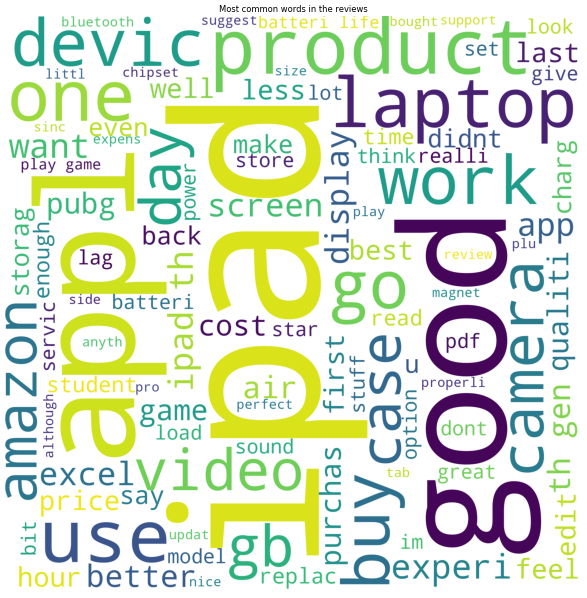

In [19]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000,max_words=100, background_color='white')
wordcloud = wordcloud.generate(' '.join(rv['Reviews'].tolist()))
plt.figure(figsize=(15,15),dpi=50)
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

In [20]:
from textblob import TextBlob
rv['sentiment_score'] = rv['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
rv[['Reviews','sentiment_score']].head()

,Reviews,sentiment_score
0,media could load list con remain aspect devic prosfront camera underwhelm rear camera averag camera setup ipad th genth chipset still fusion ipad th gen call ipad th gen altleast given bionic x chipseta give bionic would put categori ipad air ipad air rest prosso overal star star less chang soc heart deviceit basic ipad th gen slightli bigger inch retina hd screen cant differenti ipad screen ipad th gener screen though term qualiti extra gigabyt ram magnet connector right side connect st gen appl ipad keyboardp review tech video say devic air gap display like ipad pro rest assur pack exact display tech ipad th gener afford ipad non air gap display get ipad air ipad air ps get ipad th gen k lesser ipad go wont regret signific compromis make loss year softwar updat amount money save wort...,0.128297
1,perfect product day day task heavi edit stuff new ipad os make ipad sweet dealpro display excel display lot peopl compar expens ipad airgap display yhe size price better lot laptop also plu resolut remain bigger ipad sound amaz sound speaker though one side surround sound sound qualiti great batteri life last day without charg usag ipad os make super convini mani thing u need laptop replac laptop extent bar thingsconsa chip slow chip ye fact futur proof think year line appl stop updat chipstorag gb base today time less atleast plu upgrad cost bomb bring closer ipad airg model cost wop k that crazi ask price samecamera r worst camera hand front camera mp doesnot feel good video call alsoaccessori appl accessori cost bomb key board cover around k appl pencil like koveral satisfi product use,0.175168
2,amazon product appl support product work fineth last fail updat result boot loopappl store could fix error code anyth els suggest internet could eithernot good trash canappl would buy back go purchas anoth ipadwhi compani servic product insisit sell newer one lie buy older one back nutsproduct greatbut servic patheticmay due purpos,0.034524
3,highli recommend student good batteri backup good game lag play game,0.150000
4,media could load nice,0.600000


In [21]:
## Defining function to assign sentiment category based on sentiment_score
## Score Range -0.5 to 0.5 is considered as neutral
def sentiment_category(score1):
    if(score1 > 0.5):
        return 'Positive'
    elif(score1 < -0.5):
        return 'Negative'
    else:
        return 'Neutral'

In [22]:
rv['sentiment'] = rv['sentiment_score'].apply(lambda x:sentiment_category(x))

In [23]:
rv.head()

,Reviews,sentiment_score,sentiment
0,media could load list con remain aspect devic prosfront camera underwhelm rear camera averag camera setup ipad th genth chipset still fusion ipad th gen call ipad th gen altleast given bionic x chipseta give bionic would put categori ipad air ipad air rest prosso overal star star less chang soc heart deviceit basic ipad th gen slightli bigger inch retina hd screen cant differenti ipad screen ipad th gener screen though term qualiti extra gigabyt ram magnet connector right side connect st gen appl ipad keyboardp review tech video say devic air gap display like ipad pro rest assur pack exact display tech ipad th gener afford ipad non air gap display get ipad air ipad air ps get ipad th gen k lesser ipad go wont regret signific compromis make loss year softwar updat amount money save wort...,0.128297,Neutral
1,perfect product day day task heavi edit stuff new ipad os make ipad sweet dealpro display excel display lot peopl compar expens ipad airgap display yhe size price better lot laptop also plu resolut remain bigger ipad sound amaz sound speaker though one side surround sound sound qualiti great batteri life last day without charg usag ipad os make super convini mani thing u need laptop replac laptop extent bar thingsconsa chip slow chip ye fact futur proof think year line appl stop updat chipstorag gb base today time less atleast plu upgrad cost bomb bring closer ipad airg model cost wop k that crazi ask price samecamera r worst camera hand front camera mp doesnot feel good video call alsoaccessori appl accessori cost bomb key board cover around k appl pencil like koveral satisfi product use,0.175168,Neutral
2,amazon product appl support product work fineth last fail updat result boot loopappl store could fix error code anyth els suggest internet could eithernot good trash canappl would buy back go purchas anoth ipadwhi compani servic product insisit sell newer one lie buy older one back nutsproduct greatbut servic patheticmay due purpos,0.034524,Neutral
3,highli recommend student good batteri backup good game lag play game,0.150000,Neutral
4,media could load nice,0.600000,Positive


In [24]:
## calculating the categories of sentiments and their counts
rv['sentiment'].value_counts()

Neutral     28
Positive     2
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

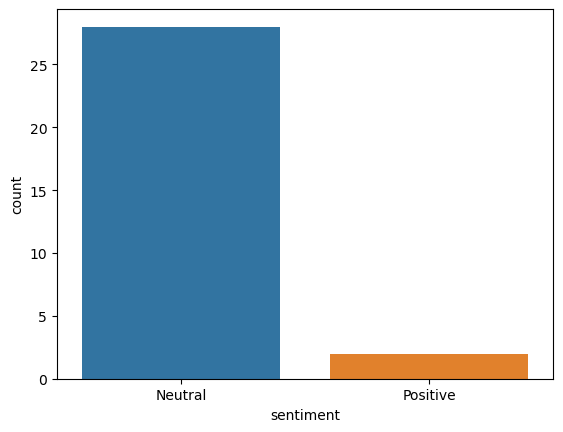

In [25]:
sns.countplot(x=rv['sentiment'])